## Practice Project - 3

Red Wine Quality Prediction Problem Statement: The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

Submission Details

Share the link of the repository as your submission.
Downlaod Files: https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [3]:
#url = 'https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv'

In [4]:
#reading text file, file is saved locally on my computer
wine_dataset = pd.read_table(r'C:\Users\Administrator\Desktop\wine.txt', sep=",")
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_dataset.shape

(1599, 12)

In [6]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### There is no missing data

In [7]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
print("Quality of wines: ", wine_dataset['quality'].unique())
print("Number of each wines: ", "\n", wine_dataset['quality'].value_counts())

Quality of wines:  [5 6 7 4 8 3]
Number of each wines:  
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

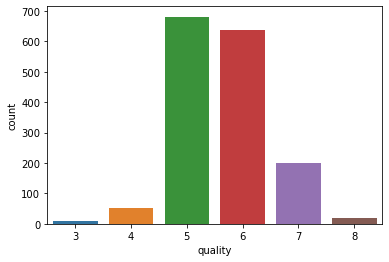

In [10]:
sns.countplot(x="quality", data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

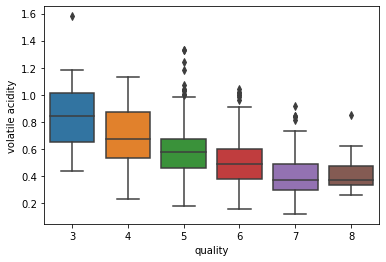

In [24]:
sns.boxplot(x= 'quality', y='volatile acidity', data=wine_dataset)

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

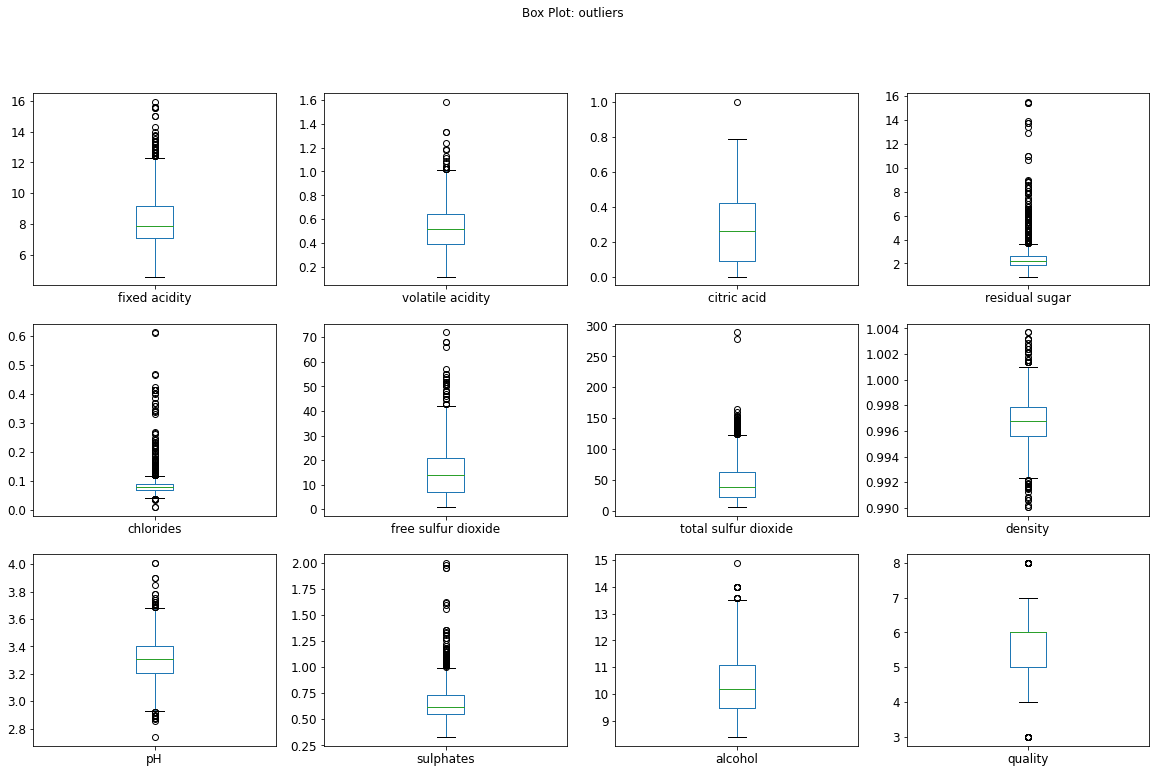

In [77]:
wine_dataset.plot(kind='box', subplots = True, layout = (3,4), figsize = (20,12), title = "Box Plot: outliers", fontsize = 12)

## Distribution Plots

<AxesSubplot:xlabel='quality', ylabel='Density'>

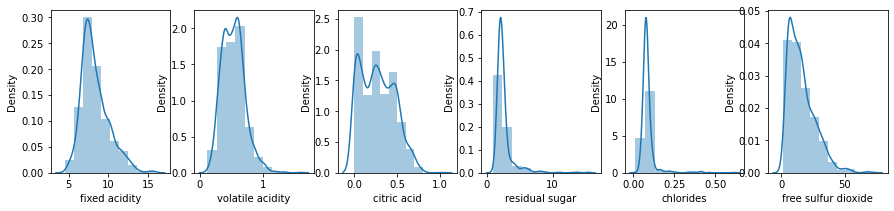

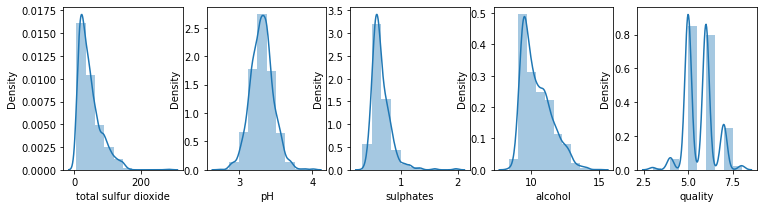

In [25]:
plt.figure(1, figsize=(15,3))

plt.subplot(161)
sns.distplot(wine_dataset['fixed acidity'], bins=10)
plt.subplot(162)
sns.distplot(wine_dataset['volatile acidity'], bins=10)
plt.subplot(163)
sns.distplot(wine_dataset['citric acid'], bins=10)
plt.subplot(164)
sns.distplot(wine_dataset['residual sugar'], bins=10)
plt.subplot(165)
sns.distplot(wine_dataset['chlorides'], bins=10)
plt.subplot(166)
sns.distplot(wine_dataset['free sulfur dioxide'], bins=10)

plt.figure(2, figsize=(15,3))
plt.subplot(162)
sns.distplot(wine_dataset['total sulfur dioxide'], bins=10)
plt.subplot(163)
sns.distplot(wine_dataset['pH'], bins=10)
plt.subplot(164)
sns.distplot(wine_dataset['sulphates'], bins=10)
plt.subplot(165)
sns.distplot(wine_dataset['alcohol'], bins=10)
plt.subplot(166)
sns.distplot(wine_dataset['quality'], bins=10)

    Distribution plots reveal that pH is normally dirtributed and all other  independent features have right skewness. 
    'volatile acidity','citric acid' show 2 and 3 modes respectively.

<AxesSubplot:>

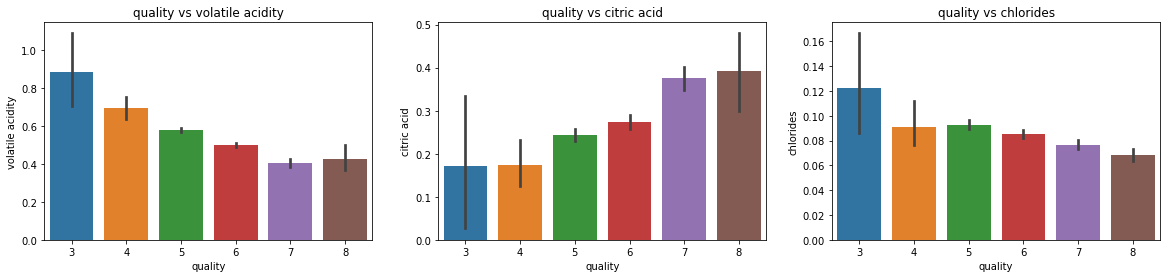

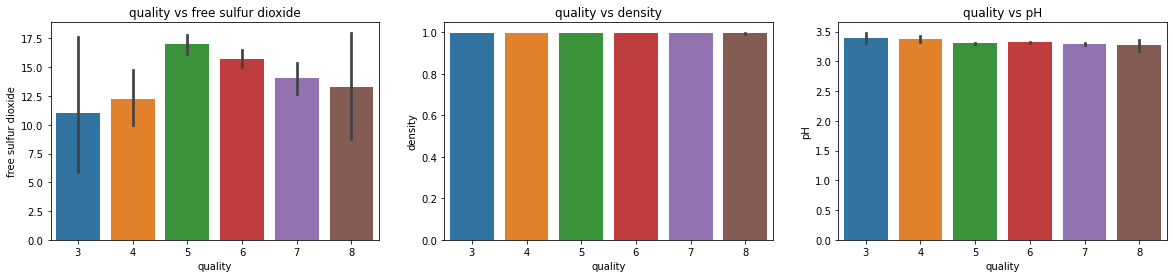

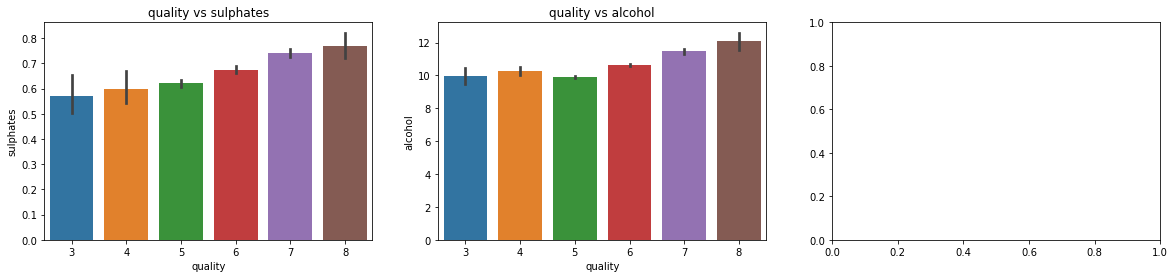

In [26]:
plt.figure(3, figsize=(20,4))
plt.subplot(131)
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset).set_title('quality vs volatile acidity')
plt.subplot(132)
sns.barplot(x='quality', y='citric acid', data=wine_dataset).set_title('quality vs citric acid')
plt.subplot(133)
sns.barplot(x='quality', y='chlorides', data=wine_dataset).set_title('quality vs chlorides')

plt.figure(4, figsize=(20,4))
plt.subplot(131)
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_dataset).set_title('quality vs free sulfur dioxide')
plt.subplot(132)
sns.barplot(x='quality', y='density', data=wine_dataset).set_title('quality vs density')
plt.subplot(133)
sns.barplot(x='quality', y='pH', data=wine_dataset).set_title('quality vs pH')

plt.figure(5, figsize=(20,4))
plt.subplot(131)
sns.barplot(x='quality', y='sulphates', data=wine_dataset).set_title('quality vs sulphates')
plt.subplot(132)
sns.barplot(x='quality', y='alcohol', data=wine_dataset).set_title('quality vs alcohol')
plt.subplot(133)

      Following observations may be inferred from the graphs
        As 'volatile acidity' decreases the 'quality' of wine increases (good). 
        As 'citric acid' increases the 'quality' of wine increases (good). 
        As 'chlorides' decreases the 'quality' of wine increases (good)
        As 'sulphates' increases the 'quality' of wine increases (good).
        As 'alcohol' increases the 'quality' of wine increases (good).

<AxesSubplot:>

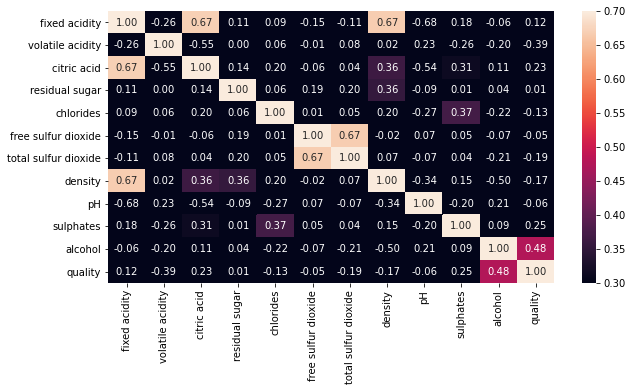

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(wine_dataset.corr(), annot=True, vmin=0.3, vmax=0.7, fmt='0.2f')

### These are positively correlated
    'fixed acidity' & 'citric acid'
    'fixed acidity' & 'density'
    'alcohol'& 'quality'

# Preprocessing

In [29]:
#features X
X = wine_dataset.drop(['quality'], axis=1)
X.shape

(1599, 11)

In [30]:
#target y
y =wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
y.shape

(1599,)

In [31]:
#splitting the dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [57]:
#checking the size of dataset
print("X size: ", X.shape, ",", "y size:", y.shape)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X size:  (1599, 11) , y size: (1599,)
X_train:  (1279, 11)
X_test:  (320, 11)
y_train:  (1279,)
y_test:  (320,)


## Building ML model without scaling using RandomForestClassifier

In [33]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
X_test_prediction_rfc = model_rfc.predict(X_test)
test_data_accuracy_rfc = accuracy_score(y_test, X_test_prediction_rfc)
print("Accuracy score using Random Forest Classifier = ", test_data_accuracy_rfc*100,"%")

Accuracy score using Random Forest Classifier =  93.125 %


## Building ML model without scaling using LogisticRegression

In [34]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
X_test_prediction_lr = model_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(y_test, X_test_prediction_lr)
print("Accuracy score using Logistic regression = ", test_data_accuracy_lr*100,"%")

Accuracy score using Logistic regression =  88.4375 %


## Scaling The data using StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Importing ML libraries

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Building Models after scaling

In [50]:
def models(X_train, y_train):
    #LogisticRegression Algorithm
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)

    #KNeighborsClassifiers Algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    #SVM(linear)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, y_train)
    #SVM(radialbasisfunction)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    
    #naivebayes (GaussianNB)
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    #Model accuracies
    print("LogisticRegression training accuracy: ",  log.score(X_train, y_train))
    print("KNeighborsClassifiers training accuracy: ", knn.score(X_train, y_train))
    print("SVM(linear) training accuracy: ", "\t", svc_lin.score(X_train, y_train))
    print("SVM(radialbasisfunction) training accuracy: ", svc_rbf.score(X_train, y_train))
    print("naivebayes (GaussianNB) training accuracy: ", gauss.score(X_train, y_train))
    print("DecisionTreeClassifier training accuracy: ", tree.score(X_train, y_train))
    print("RandomForestClassifier training accuracy: ", forest.score(X_train, y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [51]:
model = models(X_train, y_train) 

LogisticRegression training accuracy:  0.8795934323690383
KNeighborsClassifiers training accuracy:  0.9030492572322126
SVM(linear) training accuracy:  	 0.8623924941360438
SVM(radialbasisfunction) training accuracy:  0.8999218139171228
naivebayes (GaussianNB) training accuracy:  0.8420641125879593
DecisionTreeClassifier training accuracy:  1.0
RandomForestClassifier training accuracy:  0.9929632525410477


## Evaluating Performance on Test data using Confusion Matrix

In [63]:
for i in range(len(model)):
    print()
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    print("confusion matrix")
    print(cm)
    print('Model[{}] testing accuracy = "{}"'.format(i,(TP+TN)/(TP+TN+FN+FP)))
    print("classification_report: ", "\n", classification_report(y_test, model[i].predict(X_test)))
    print("-"*50)


confusion matrix
[[269  10]
 [ 26  15]]
Model[0] testing accuracy = "0.8875"
classification_report:  
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       279
           1       0.60      0.37      0.45        41

    accuracy                           0.89       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.87      0.89      0.88       320

--------------------------------------------------

confusion matrix
[[260  19]
 [ 20  21]]
Model[1] testing accuracy = "0.878125"
classification_report:  
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       279
           1       0.53      0.51      0.52        41

    accuracy                           0.88       320
   macro avg       0.73      0.72      0.72       320
weighted avg       0.88      0.88      0.88       320

--------------------------------------------------

confusion matrix
[[279   0]
 [ 41

### The training and testing accuracy score of RandomForestClassifier is good about 99% & 92.5% respectively

In [74]:
import joblib
joblib.dump(model, "WINE_QUALITY")
model = joblib.load('WINE_QUALITY')
model

(LogisticRegression(random_state=0),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

# ------------------END--------------------